In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Data_Lesson3_a_Insurance.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               27 non-null     int64
 1   Bought_Insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [3]:
df.describe()

,Age,Bought_Insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


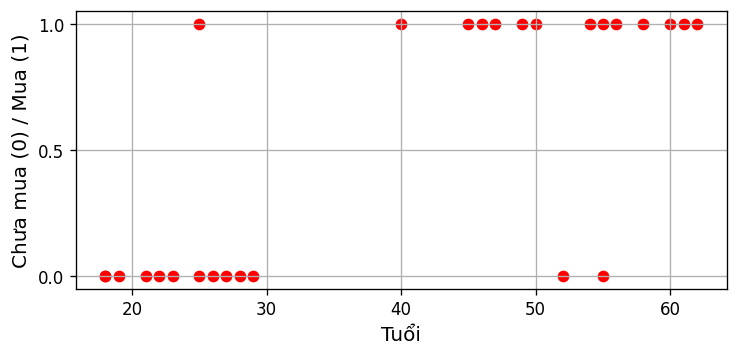

In [5]:
# vẽ hình thể hiện hai biến x , y

plt.xlabel('Tuổi', fontsize = 12)
plt.ylabel('Chưa mua (0) / Mua (1)', fontsize = 12)

plt.yticks([0.0, 0.5, 1.0])

plt.scatter(df.Age, df.Bought_Insurance, color = 'red', marker = 'o')
plt.grid()

In [8]:
x = df[['Age']]
y= df.Bought_Insurance

from sklearn.model_selection import train_test_split # thư viện hỗ trợ chia data thành train và test set

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 0)
x_train, x_test, y_train, y_test

(    Age
 20   21
 16   25
 1    25
 10   18
 26   23
 25   54
 8    62
 6    55
 4    46
 18   19
 9    61
 7    60
 22   40
 3    52
 0    22
 21   26
 15   55
 12   27,
     Age
 2    47
 24   50
 14   49
 17   58
 5    56
 11   28
 23   45
 13   29
 19   18,
 20    0
 16    1
 1     0
 10    0
 26    0
 25    1
 8     1
 6     0
 4     1
 18    0
 9     1
 7     1
 22    1
 3     0
 0     0
 21    0
 15    1
 12    0
 Name: Bought_Insurance, dtype: int64,
 2     1
 24    1
 14    1
 17    1
 5     1
 11    0
 23    1
 13    0
 19    0
 Name: Bought_Insurance, dtype: int64)

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [10]:
#dự báo cho tập test
y_predict = model.predict(x_test)
y_predict

array([1, 1, 1, 1, 1, 0, 1, 0, 0])

In [11]:
y_test # => cho thấy tập test dự báo đúng 100%

2     1
24    1
14    1
17    1
5     1
11    0
23    1
13    0
19    0
Name: Bought_Insurance, dtype: int64

In [12]:
#dự báo một tuổi bất kì đã mua bảo hiểm hay chưa
model.predict([[20]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [13]:
model.score(x_test, y_test) # => có thể dùng hàm model_score để vừa dự báo vừa đánh giá mô hình => 1 = 100%

1.0

In [15]:
a = model.coef_
a

array([[0.1015288]])

In [16]:
b = model.intercept_
b

array([-4.23087166])

In [ ]:
# 1 / (1 + e ^ -(0.1x - 4))

In [17]:
# có thể dự báo chi tiết hơn bằng giá trị xác suất
model.predict_proba(x_test)

##Chúng ta nhìn vào cột thứ 2 giá trị dự báo lớn hơn 0.5 thì đc coi là có mua bảo hiểm và ngược lại. Nhưng ở bảng thông tin về xác xuất chúng ta biết rõ hơn là bao nhiêu phần trăm

array([[0.36795916, 0.63204084],
       [0.3003633 , 0.6996367 ],
       [0.32212141, 0.67787859],
       [0.16005769, 0.83994231],
       [0.18927295, 0.81072705],
       [0.80028318, 0.19971682],
       [0.41631374, 0.58368626],
       [0.78356036, 0.21643964],
       [0.91708265, 0.08291735]])

In [18]:
from sklearn.linear_model import LinearRegression

model_lin = LinearRegression()
model_lin.fit(x_train, y_train)

LinearRegression()

In [20]:
y_predict_lin = model_lin.predict(x_test)
y_predict_lin

array([0.61581478, 0.67551799, 0.65561692, 0.83472656, 0.79492442,
       0.23769443, 0.57601264, 0.2575955 , 0.03868372])

In [22]:
Pre = []

for i in range(len(y_predict_lin)):
  if y_predict_lin[i] > 0.5:
    Pre.append(1)
  else: Pre.append(0)

Pre

[1, 1, 1, 1, 1, 0, 1, 0, 0]

In [23]:
y_test

2     1
24    1
14    1
17    1
5     1
11    0
23    1
13    0
19    0
Name: Bought_Insurance, dtype: int64

Bài 3b) Xây dựng mô hình Logistic Regression phân loại cho vay (đa biến)

In [25]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('Data3_b_Loan.csv')

data

,Salary,Time_year,Loan
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [26]:
data.describe()

,Salary,Time_year,Loan
count,20.000000,20.000000,20.000000
mean,6.350000,1.090000,0.500000
std,1.814416,0.900088,0.512989
min,4.000000,0.100000,0.000000
25%,5.000000,0.300000,0.000000
50%,6.500000,1.000000,0.500000
75%,8.000000,1.850000,1.000000
max,10.000000,3.000000,1.000000


In [29]:
y = data['Loan']
x = data.drop('Loan', axis = 'columns', inplace = False)
x

,Salary,Time_year
0,10,1.00
1,5,2.00
2,6,1.80
3,7,1.00
4,8,2.00
5,9,0.50
6,4,3.00
7,5,2.50
8,8,1.00
9,4,2.50


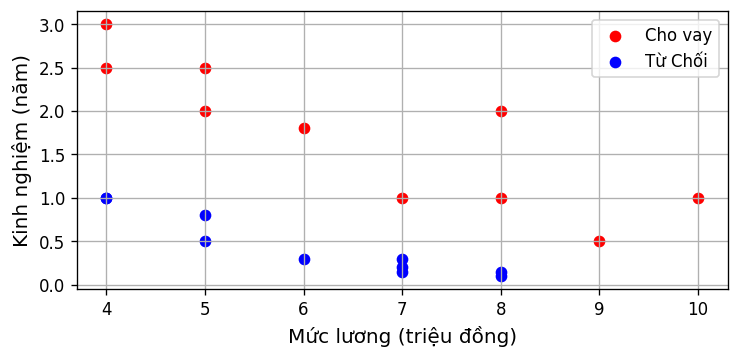

In [32]:
# vẽ hình thể hiện các biến

plt.xlabel('Mức lương (triệu đồng)', fontsize = 12)
plt.ylabel('Kinh nghiệm (năm)', fontsize = 12)
plt.grid()

plt.scatter(x[y.isin([1])].Salary, x[y.isin([1])].Time_year, color = 'red', label = 'Cho vay')
plt.scatter(x[y.isin([0])].Salary, x[y.isin([0])].Time_year, color = 'blue', label = 'Từ Chối')

plt.legend()

In [34]:
data.head(5)

,Salary,Time_year,Loan
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.3, random_state = 0)

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [41]:
# độ chính xác của mô hình
model.score(x_test, y_test)

0.5

In [42]:
import seaborn as sns
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[4, 2],
       [5, 3]])

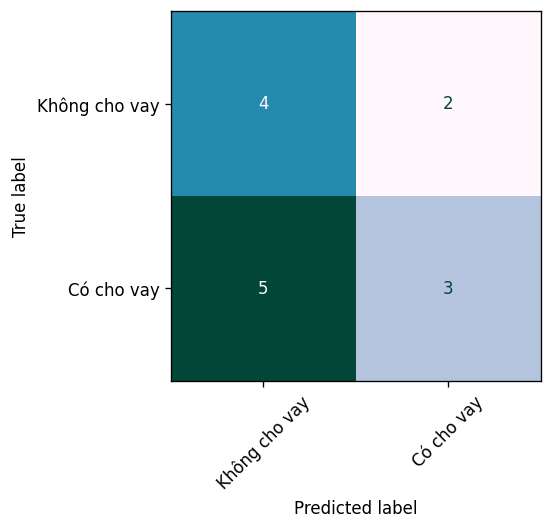

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize = (4,4))
labels = ['Không cho vay', 'Có cho vay']
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, display_labels = labels, xticks_rotation = 45, ax = ax, colorbar = False, cmap = 'PuBuGn')